<a href="https://colab.research.google.com/github/meharsg/grip/blob/main/GRIP_2_Prediction_using_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective**: From given iris dataset, predict the optimum number of clusters and represent it visually. 

In [ ]:
#importing libraries
from google.colab import files
import io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
#uploading dataset
uploaded = files.upload()

Saving iris.csv to iris (1).csv


In [ ]:
#creating dataframe
df = pd.read_csv(io.BytesIO(uploaded['iris.csv']))

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


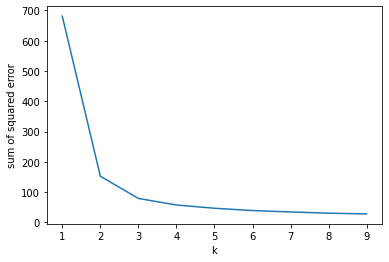

In [ ]:
#using elbow method to determine optimal number of clusters
k_rng = range(1,10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm']])
  sse.append(km.inertia_)

plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_rng, sse)

We can see that the plot **elbows** at **k=3**.

In [ ]:
#using kmeans algo
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm']])
df['cluster'] = y_predicted

The given dataset is not easy to graph in its original form. Therefore we have to reduce the number of dimensions by applying a dimensionality reduction algorithm that operates on all four numbers and outputs two new numbers (that represent the original four numbers) that we can use to do the plot.

In [ ]:
#dimension reduction
pca = PCA(n_components=2).fit(df[['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm']])
pca_2d = pca.transform(df[['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm']])

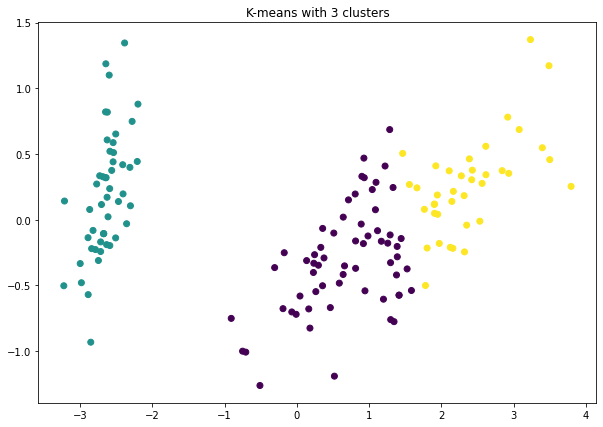

In [ ]:
#visualizing clusters
plt.figure(figsize=(10,7))
plt.title('K-means with 3 clusters')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=km.labels_)
plt.show()